# [4.3] 서포트 벡터 머신 (Support Vector Machine, SVM) 알고리즘

- 지도학습 알고리즘 > '분류'에 이용

## 이론


> Data의 특징을 벡터로 표현하고, 이를 가장 잘 분류할 수 있는 '결정 경계'를 찾는 알고리즘


### 사용되는 용어 정리


SVM 알고리즘에서 사용되는 기본적인 용어들에 대해서 정리해보도록 하겠다.


#### * 결정 경계(Decision Boundary)


SVM 알고리즘에서 가장 중요한 것이다. (이것을 찾는 것이 알고리즘의 목표!)


**결정 경계(Decision Boundary)란**,
> Data를 구분하는 경계; 초평면(hyperplane)으로 칭하기도 함.


Data의 특징을 구현한 벡터 공간이 (n)차원일 경우, 결정 경계는 (n-1)차원의 초평면으로 나타난다.


　


#### * 서포트 벡터(Support Vector)


**서포트 벡터(Support Vector)란**,
> 결정 경계와 가장 가까이 맞닿은 Data 포인트


　


#### * 마진(Margin)


**마진(Margin)이란**,
> 서포트 벡터와 결정 경계 사이의 거리


'마진'을 최대로 하는 결정 경계를 찾는 것이 SVM 알고리즘의 목표라고 할 수 있다.


서포트 벡터와 결정 경계 사이의 거리, 즉 마진이 클수록 우리가 예측하고 싶은 새로운 Data를 더 안정적으로 분류할 가능성이 높아지기 때문!


~~경계선이랑 학습 Data가 따닥따닥 붙어있으면 오류가 날 가능성이 높아지겠지!~~


　


#### * 비용(Cost)


**비용(Cost)이란**,
> 결정 경계를 구할 때, 약간의 오류를 허용하기 위해 할당하는 변수


오류가 아예 없으면 가장 이상적이겠지만, 현실적으로 그런 모델을 구현하기는 굉장히 어렵다.


따라서, 모델을 구현하는 과정에서 결정 경계를 구할 때 약간의 오류를 허용하기 위해서 '비용'이란 변수를 사용한다.


- 비용이 낮을수록... -> 마진을 최대한 높이고, 학습 에러율을 증가시키는 방향으로 결정 경계를 구함.
    * 이 경우, '과소적합(Underfitting)'의 위험이 있음!


반대로,


- 비용이 높을수록... -> 마진을 최대한 낮추고, 학습 에러율을 감소시키는 방향으로 결정 경계를 구함.
    * 이 경우, '과대적합(Overfitting)'의 위험이 있음!
    
    
cf) 성능이 좋은 머신러닝 모델이란 학습 시 에러가 적은 모델이 아닌, 테스트 및 운용 시 에러가 적은 모델!


결국, 적절한 비용을 찾아야함! (비용은 마진의 너비를 조절하는 변수)


　


#### * 커널 트릭(Kernel Trick)


> 실제로 Data를 고차원 벡터 공간으로 옮기지 않고 동일한 효과만 주어서 빠른 속도로 결정 경계를 찾는 방법


Data를 표현한 벡터 공간에서 무조건 결정 경계를 구할 수는 없다. 실제로 1차원 벡터 공간(직선)의 결정 경계는 0차원 벡터 공간(점)으로 표현되는데, 점 하나로 Data를 분류하기는 거의 불가능하다.


이런 문제를 해결하고자, 고안된 방법이 고차원의 벡터 공간으로 옮겨서 결정 경계를 찾는 방법이다.


하지만, 모든 Data를 고차원 벡터 공간으로 모두 옮기기에는 계산량이 너무 많다. 그래서 '커널 트릭'이라는 방법이 고안된 것!


예를 들어 2차원 벡터 공간에서 결정 경계가 직선이 아닌 다른 형태로 나타나 있다면, 이는 커널 트릭의 결과로 봐도 무방하다고 한다. ~~(저자님이 책에 설명을 잘 해주셔서 감사한데, 여기다가 표현할 방법을 모르겠다...!)~~


이 책에서는 예제를 다루기 위해서 커널 중 **'가우시안 RBF(Radial Basis Function, 방사형 기저 함수) 커널'**을 사용하였다.


'가우시안 RBF 커널'은 감마(gamma, γ) 변수를 추가적으로 가진다. 감마 변수는 커널 함수의 표준편차인데, 이를 조절해서 결정 경계의 곡률을 조절할 수 있다.


- 감마 값을 크게 하면... -> 표준편차가 작아짐 -> 결정 경계가 작아짐 -> 경계가 구부러짐

## 장/단점


### 장점


- 커널 트릭을 사용해서 특성이 다양한 데이터를 분류하는 데 강함.~~(고차원 벡터 공간으로 옮기면 되니까!)~~
- 적은 학습 Data의 양으로도 딥러닝만큼의 정확도를 기대할 수 있음.


　


### 단점


- 데이터 전처리 과정(Data Preprocessing)이 굉장히 중요함!!!!!
- 특성이 너무 많으면 결정 경계나, Data를 시각화하는 것이 어려움.~~(고차원 벡터 공간이니까...)~~

## 예제) 농구선수의 게임 데이터를 활용한 포지션 예측

### 최적의 SVM 파라미터 찾기

사이킷런의 그리드 서치(gridsearch)를 사용하면 최적의 비용과 감마 값을 알아낼 수 있다!


단, 파라미터의 후보들은 사용자가 입력해야함. 이렇게 입력받은 파라미터를 모두 조합해서 최적의 값의 조합을 찾아내는 것!

In [1]:
# [4.2]에서 사용했던 농구선수 Data를 그대로 이용하기 위한 작업


from sklearn.model_selection import train_test_split
import pandas as pd
import os


os.chdir('/workspace/DS033')

df = pd.read_csv('DS060/data/csv/basketball_stat.csv')
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

train, test = train_test_split(df, test_size = 0.2)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt


def svc_param_selection(X, y, nfolds):
    # 'svm_parameters'에 저장한 Parameter 중 가장 좋은 조합을 구해주는 함수 정의
    
    svm_parameters = [
        {'kernel':['rbf'],
         'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
         'C':[0.01, 0.1, 1, 10, 100, 1000]}
        ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv = 10)
                       # 'SVC()'는 class 객체임!
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)  # class의 Attributes를 출력하는 것.
    #  'best_params_'에는 코드를 돌려본 후, 최적의 결과를 제공하는 Parameter가 딕셔너리 형태로 저장됨.
    
    return clf


X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]


clf = svc_param_selection(X_train, y_train.values.ravel(), 10)
#  농구 선수 Data를 학습시켜서 가장 최적의 결과를 제공하는 Parameter 정보로 학습된 모델 객체를 'clf' 변수에 저장

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### 결정 경계 시각화하기

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or

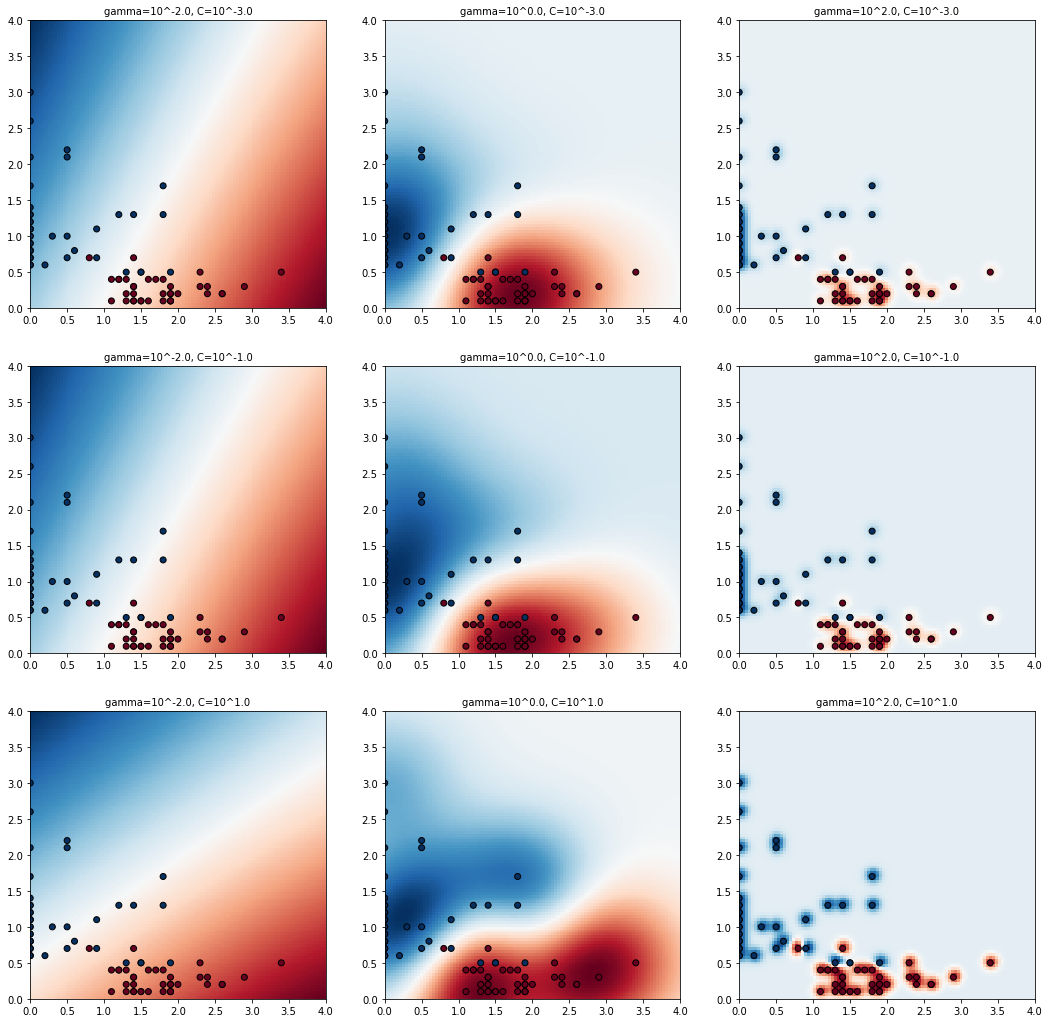

In [3]:
C_candidates = []  # 비용(C) 후보들을 저장할 리스트
                   # 비교할 수 있도록 최적의 비용 값에 0.01배, 100배 한 값도 추가함.
C_candidates.append(clf.best_params_['C'] * 0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C'] * 100)

gamma_candidates = []  # 감마(gamma) 후보들을 저장할 리스트
                       # 비교할 수 있도록 최적의 감마 값에 0.01배, 100배 한 값도 추가함.
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)


# 학습할 Data 준비
X = train[['3P', 'BLK']]  # 'DataFrame' Type
Y = train['Pos'].tolist()  # 'Series' -> 'list'로 Type 변환


# 'str' Type으로 저장된 Position 정보를 (0 / 1)의 Binary 형태의 숫자로 바꿔서 리스트에 저장
position = []

for gt in Y:
    if gt == 'C':  # 'C(센터)'의 경우 0을, 그 외에는('SG(슈팅가드)') 1을 할당
        position.append(0)
    else:
        position.append(1)
        
        
# 맨 위에서 저장한 Parameter 조합을 적용해서 학습한 모델을 'classifiers' 리스트에 저장
classifiers = []

for C in C_candidates:
    for gamma in gamma_candidates:
        clf = SVC(C = C, gamma = gamma)  # 해당하는 Parameter 정보 적용해서 객체(class) 생성
        clf.fit(X, Y)  # 학습 Data 적용
        classifiers.append((C, gamma, clf))  # 리스트에 모델 정보를 '튜플' 형태로 저장
        

        
# 본격적으로 학습한 모델들을 시각화하는 단계!

plt.figure(figsize = (18, 18))  # 그림 그릴 도화지를 준비한 것이라고 생각하면 됨.
                                # 가로, 세로 각각 18 inch로 도화지 설정
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))


for (k, (C, gamma, clf)) in enumerate(classifiers):  # enumerate 함수 -> 순서가 있는 자료형에 index 부여
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_candidates), len(gamma_candidates), k + 1)
    plt.title('gamma=10^{0}, C=10^{1}'.format(np.log10(gamma), np.log10(C)), size = 'medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap = plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c = position, cmap = plt.cm.RdBu_r, edgecolors = 'k')

### 모델 테스트

In [4]:
# 테스트 Data 준비
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]


y_true, y_pred = y_test, clf.predict(X_test)
# 'predict()' 메서드를 통해 테스트 Data 예측
# 실제 값은 'y_true'에, 모델의 예측 값은 'y_pred'에 저장


print(classification_report(y_true, y_pred))  # 주요 측정 항목들을 텍스트로 보여줌.
print()
print("accuracy : {}".format(accuracy_score(y_true, y_pred)))  # 실제 값과 예측 값을 비교해서 정확도를 보여줌.

              precision    recall  f1-score   support

           C       0.89      1.00      0.94         8
          SG       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


accuracy : 0.95


In [5]:
comparison = pd.DataFrame({'prediction':y_pred,
                          'ground_truth':y_true.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,SG,SG
9,SG,SG
